In [47]:
import numpy as np
import pandas as pd

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# for visualization
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Load the data.
dataset = pd.read_csv('samples/Network_anomaly_data.csv', nrows = 10000)

In [49]:
dataset = dataset.drop(["duration", "protocoltype", "land", "flag", "urgent", "hot", "numfailedlogins", "numcompromised", "rootshell", "suattempted", "numroot"], axis = 1)
dataset = dataset.drop(["numfilecreations", "numshells", "numaccessfiles", "numoutboundcmds", "ishostlogin", "dsthostsrvcount"], axis = 1)
dataset = dataset.drop(["dsthostsrvdiffhostrate", "dsthostserrorrate", "dsthostsrvserrorrate", "dsthostrerrorrate", "dsthostsrvrerrorrate"], axis = 1)
dataset = dataset.drop(["lastflag", "wrongfragment", "srvrerrorrate", "samesrvrate", "diffsrvrate", "srvdiffhostrate"], axis = 1)
dataset = dataset.drop(["loggedin"], axis = 1)
dataset = dataset.drop(["isguestlogin"], axis = 1)
dataset = dataset.drop(["count"], axis = 1)
dataset = dataset.drop(["srvcount"], axis = 1)
dataset = dataset.drop(["rerrorrate"], axis = 1)
dataset = dataset.drop(["dsthostcount"], axis = 1)
dataset = dataset.drop(["dsthostsamesrvrate"], axis = 1)
dataset = dataset.drop(["dsthostdiffsrvrate"], axis = 1)
dataset = dataset.drop(["dsthostsamesrcportrate"], axis = 1)				

In [50]:
dataset['attack'] = [1 if i == "normal" else 0 for i in dataset['attack']]

unique_values = dataset['service'].unique()
print(unique_values)

# Створюємо словник, що відображає кожен унікальний рядок на відповідне числове значення
mapping = {value: index for index, value in enumerate(unique_values, start=1)}

# Замінюємо категоріальні значення на числові значення
dataset['service'] = dataset['service'].replace(mapping)

['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11']


service  srcbytes  dstbytes  serrorrate  srvserrorrate  attack
0        1       491         0         0.0            0.0       1
1        2       146         0         0.0            0.0       1
2        3         0         0         1.0            1.0       0
3        4       232      8153         0.2            0.2       1
4        4       199       420         0.0            0.0       1

In [51]:
samples = dataset[['srcbytes', 'dstbytes']].values
targets = dataset['attack']

In [52]:
# Визначаємо мінімальне та максимальне значення для кожного стовпця
min_values = np.min(samples, axis=0)
max_values = np.max(samples, axis=0)

# Нормалізуємо дані
samples = (samples - min_values) / (max_values - min_values)

In [53]:
le = LabelEncoder()
targets = le.fit_transform(targets)

In [54]:
training_samples, testing_samples, training_targets, testing_targets = train_test_split(
         samples, targets, test_size=0.3, random_state=0)

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   service        10000 non-null  int64  
 1   srcbytes       10000 non-null  int64  
 2   dstbytes       10000 non-null  int64  
 3   serrorrate     10000 non-null  float64
 4   srvserrorrate  10000 non-null  float64
 5   attack         10000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 468.9 KB


In [56]:
dataset.head()

service  srcbytes  dstbytes  serrorrate  srvserrorrate  attack
0        1       491         0         0.0            0.0       1
1        2       146         0         0.0            0.0       1
2        3         0         0         1.0            1.0       0
3        4       232      8153         0.2            0.2       1
4        4       199       420         0.0            0.0       1

In [57]:
dataset.describe()

service      srcbytes      dstbytes    serrorrate  srvserrorrate  \
count  10000.000000  1.000000e+04  1.000000e+04  10000.000000   10000.000000   
mean      11.090000  4.792536e+04  4.145777e+03      0.291772       0.288866   
std       12.797839  3.820899e+06  1.066333e+05      0.449999       0.449971   
min        1.000000  0.000000e+00  0.000000e+00      0.000000       0.000000   
25%        3.000000  0.000000e+00  0.000000e+00      0.000000       0.000000   
50%        4.000000  4.400000e+01  0.000000e+00      0.000000       0.000000   
75%       15.000000  2.790000e+02  5.302500e+02      1.000000       1.000000   
max       64.000000  3.817091e+08  5.150772e+06      1.000000       1.000000   

             attack  
count  10000.000000  
mean       0.529200  
std        0.499172  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

[1 0 0 ... 0 1 1]
[1 0 0 ... 0 1 1]
K-Nearest Neighbours accuracy: 95.8


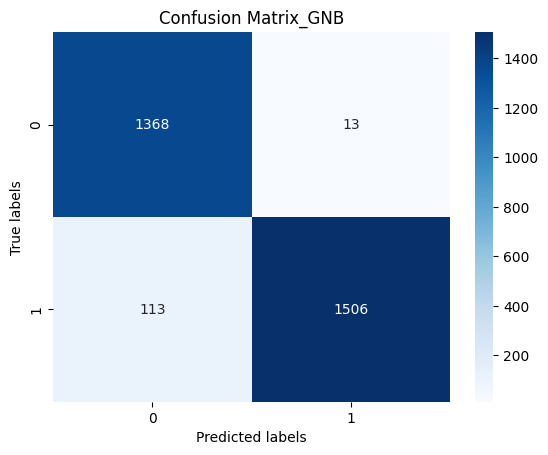

In [58]:
############
#k-Nearest Neighbors model
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(training_samples,training_targets)
knc_prediction = knc.predict(testing_samples)
knc_accuracy = 100.0 * accuracy_score(testing_targets, knc_prediction)
print (testing_targets)
print (knc_prediction)
print ("K-Nearest Neighbours accuracy: " + str(knc_accuracy))


#Create a confusion matrix
cm = confusion_matrix(testing_targets, knc_prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix_GNB')
plt.show()

[1 0 0 ... 0 1 1]
[1 0 0 ... 0 1 1]
Decision Tree accuracy: 93.93333333333334


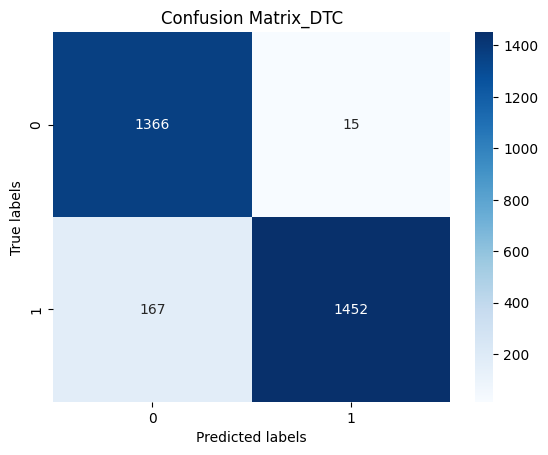

In [59]:
# Decision tree model
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(training_samples,training_targets)
dtc_prediction = dtc.predict(testing_samples)
dtc_accuracy = 100.0 * accuracy_score(testing_targets, dtc_prediction)
print (testing_targets)
print (dtc_prediction)
print ("Decision Tree accuracy: " + str(dtc_accuracy))

# Create a confusion matrix for decision tree model
cm = confusion_matrix(testing_targets, dtc_prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix_DTC')
plt.show()

Gaussian Naive Bayes accuracy: 53.733333333333334
[1 0 0 ... 0 1 1]
[1 1 1 ... 1 1 1]


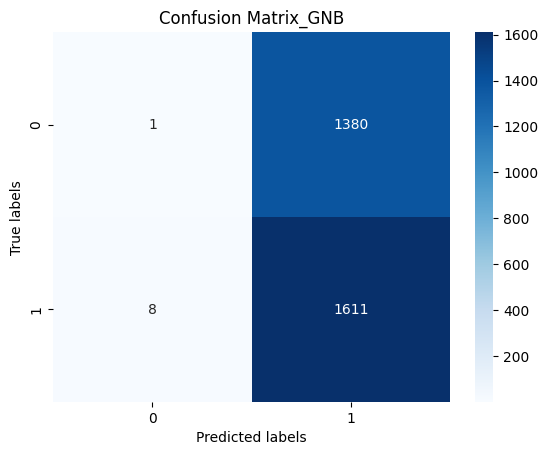

In [60]:
# Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(training_samples,training_targets)
gnb_prediction = gnb.predict(testing_samples)
gnb_accuracy = 100.0 * accuracy_score(testing_targets, gnb_prediction)
print ("Gaussian Naive Bayes accuracy: " + str(gnb_accuracy))
print (testing_targets)
print (gnb_prediction)

# Create a confusion matrix for GNB model
cm = confusion_matrix(testing_targets, gnb_prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix_GNB')
plt.show()

In [61]:
"""
Anomaly Detection Module
https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/anomaly_detection/gaussian_anomaly_detection.py
"""
from gaussian_anomaly_detection import GaussianAnomalyDetection

gaussian_anomaly_detection = GaussianAnomalyDetection(samples)

print('mu param estimation: ')
print(gaussian_anomaly_detection.mu_param)
print('sigma squared estimation: ')
print(gaussian_anomaly_detection.sigma_squared)

mu param estimation: 
[0.00012555 0.00080488]


sigma squared estimation: 
[0.00010019 0.00042855]


In [66]:
# F1 Calculation

targets = dataset['attack'].values.reshape((samples.shape[0], 1))
probs = gaussian_anomaly_detection.multivariate_gaussian(samples)

(threshold, F1, precision_, recall_, f1_) = gaussian_anomaly_detection.select_threshold(targets, probs)

print('Threshold estimation: ', threshold)
print('F1 score: ', F1)

threshold estimation:  767.261973773345
F1 score:  0.16409901332871735


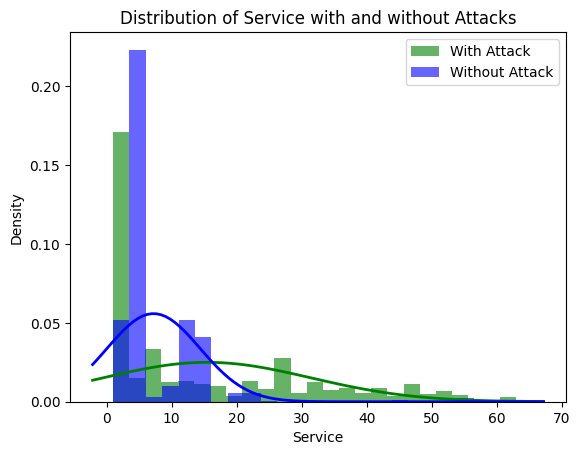

In [95]:
from scipy.stats import norm

selected_columns = ['service', 'srcbytes', 'attack']
data = dataset[selected_columns]

with_attack = data[data['attack'] == 0]
without_attack = data[data['attack'] == 1]

# Визначення параметрів гаусівських розподілів для кожної групи
mean_with_attack, std_with_attack = norm.fit(with_attack['service'])
mean_without_attack, std_without_attack = norm.fit(without_attack['service'])

# Побудова графіка
plt.hist(with_attack['service'], bins=25, density=True, alpha=0.6, color='g', label='With Attack')
plt.hist(without_attack['service'], bins=25, density=True, alpha=0.6, color='b', label='Without Attack')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_with_attack = norm.pdf(x, mean_with_attack, std_with_attack)
p_without_attack = norm.pdf(x, mean_without_attack, std_without_attack)

plt.plot(x, p_with_attack, 'g', linewidth=2)
plt.plot(x, p_without_attack, 'b', linewidth=2)

plt.xlabel('Service')
plt.ylabel('Density')
plt.title('Distribution of Service with and without Attacks')
plt.legend()
plt.show()